In [2]:
import sys
print(sys.executable)


c:\Users\SRUTIKANA\AppData\Local\Programs\Python\Python311\python.exe


In [1]:
from duckduckgo_search import DDGS

In [2]:
from fastcore.all import *

In [3]:
def search_images(keywords,max_images=30):
    print(f"Searching for {keywords}")
    return L(DDGS().images(keywords,max_results=max_images)).itemgot('image')


In [4]:
urls=search_images('bird photos',max_images=1)
urls[0]

Searching for bird photos


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

c:\Users\SRUTIKANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\curl_cffi\aio.py:204: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


In [5]:
from fastdownload import download_url

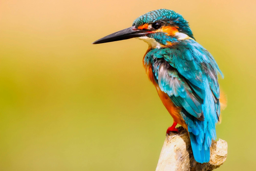

In [6]:
dest='bird.jpg'
download_url(urls[0],dest,show_progress=False)
from fastai.vision.all import*
im=Image.open(dest)
im.to_thumb(256,256)

Searching for forest photos


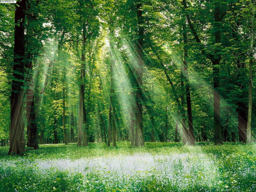

In [12]:
download_url(search_images('forest photos', max_images=1)[0],'forest.jpg',show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [13]:
searches='forest','bird'
path=Path('bird_or_not')
for o in searches:
    dest=(path/o)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    resize_image(path/o,max_size=400,dest=path/o)


Searching for forest photo


c:\Users\SRUTIKANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\curl_cffi\aio.py:204: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


Searching for bird photo


In [14]:
failed= verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

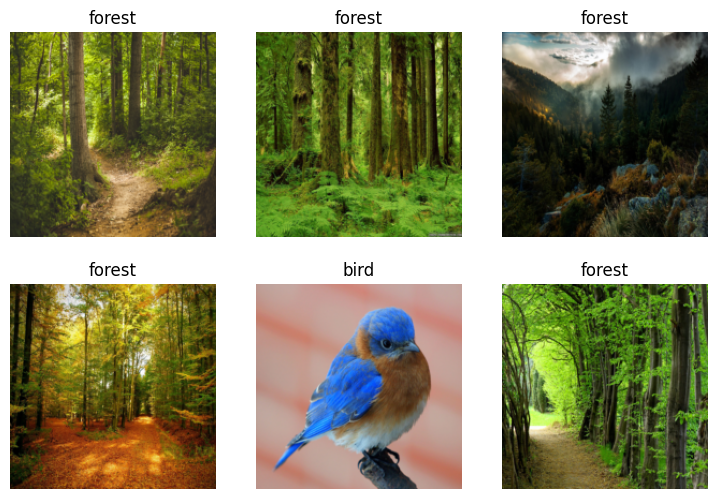

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)


In [21]:
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\SRUTIKANA/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 13.2MB/s]


epoch     train_loss  valid_loss  error_rate  time    
0         1.320054    2.619782    0.545455    00:29                             
epoch     train_loss  valid_loss  error_rate  time    
0         0.853635    2.079269    0.545455    00:36                             
1         0.914544    1.273435    0.454545    00:37                             
2         0.609230    0.703709    0.181818    00:28                             


In [22]:
is_bird,_,probs=learn.predict(PILImage.create('bird.jpg'))
print( f"this is a : {is_bird}.")
print(f"Probability it's a bird: {probs[0]: .4f}")


this is a : bird.                                                    
Probability it's a bird:  1.0000
